In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.signal import firls
from scipy.signal import lfilter
from scipy.signal import detrend
from mpl_toolkits.mplot3d import Axes3D
import math

## 1. Upsampling

In [2]:
sample_rate = 10 # Hz
data  = np.array([1,4,3,6,2,19])
Npnts = len(data)
time  = np.arange(0 , Npnts)/sample_rate

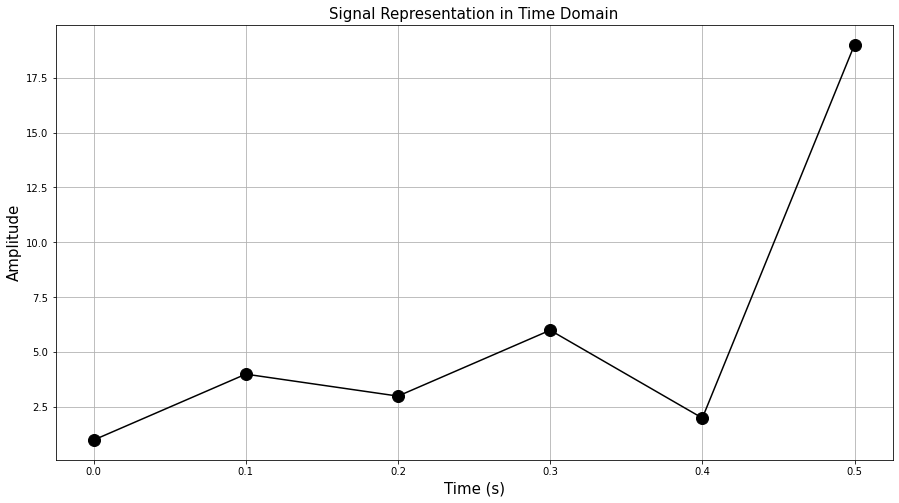

In [3]:
plt.figure(figsize = (15,8))
plt.plot(time , data , marker ='o' , markersize = 12 , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

### 1.1 Upsampling time points by a factor

In [4]:
upsample_factor = 4 
new_Npnts = Npnts * upsample_factor
new_time = np.arange(0 , new_Npnts)/sample_rate/upsample_factor

In [5]:
new_time

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575])

It contains some extrapolation points, and as we assume all the points are defined in between the start and stop, it is safe to remove them. 

In [6]:
new_time = new_time[new_time<=np.max(time)]

new_sample_rate = int(np.round(1 / np.mean(np.diff(new_time))))
interp_linear_obj = interpolate.interp1d(time , data , kind = 'linear')
interp_cubic_obj = interpolate.interp1d(time , data , kind = 'cubic')
new_data_linear = interp_linear_obj(new_time)
new_data_cubic = interp_cubic_obj(new_time)

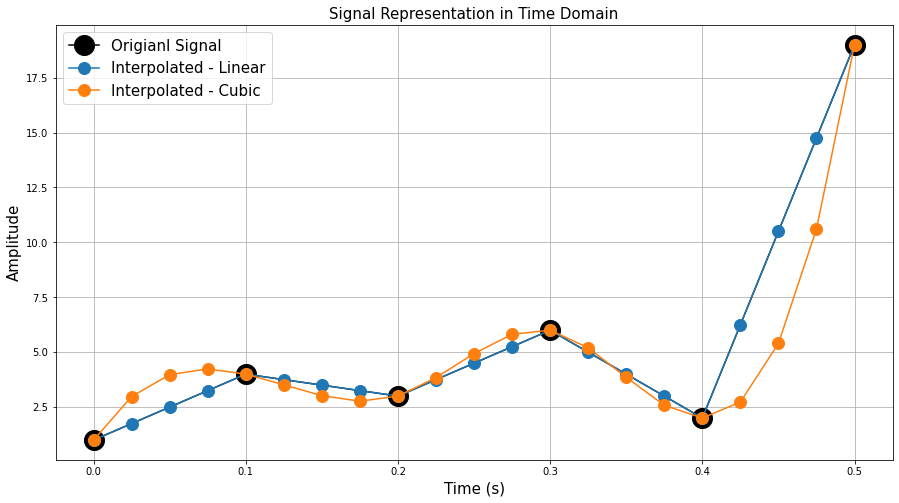

In [7]:
plt.figure(figsize = (15,8))
plt.plot(time , data , marker ='o' , markersize = 20 , c = 'black' , label = 'Origianl Signal')
plt.plot(new_time , new_data_linear , marker ='o' , markersize = 12  , label = 'Interpolated - Linear')
plt.plot(new_time , new_data_cubic , marker ='o' , markersize = 12   , label = 'Interpolated - Cubic')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.2. Upsampling to desired frequency rate

In [8]:
new_sample_rate = 42 
new_Npnts = int(np.round(Npnts*new_sample_rate/sample_rate))
new_time_freq  = np.arange(0 , new_Npnts)/new_sample_rate
new_time_freq = new_time_freq[new_time_freq<=np.max(time)]
new_data_cubic_freq = interp_cubic_obj(new_time_freq)

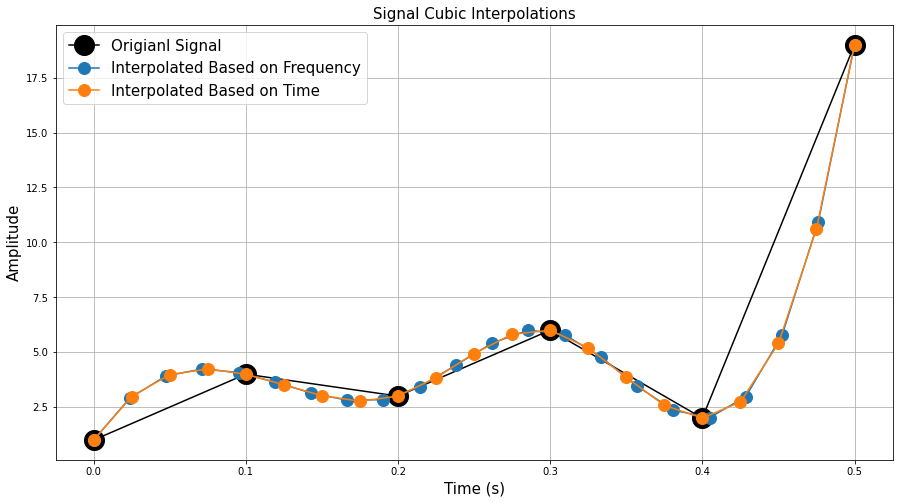

In [9]:
plt.figure(figsize = (15,8))
plt.plot(time , data , marker ='o' , markersize = 20 , c = 'black' , label = 'Origianl Signal')
plt.plot(new_time_freq , new_data_cubic_freq , marker ='o' , markersize = 12  , label = 'Interpolated Based on Frequency')
plt.plot(new_time , new_data_cubic , marker ='o' , markersize = 12   , label = 'Interpolated Based on Time')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Cubic Interpolations" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

## 2.Downsampling

In [10]:
### Prameters: 
sample_rate = 100
time = np.arange(-5 , 5 , 1/sample_rate)
center_freq = 15
Npnts = len(time)

### Signal components:
laplace = 1 - np.exp(-np.abs(time))
fast_sine = 0.25*np.sin(2*np.pi*time*center_freq)
signal = laplace + fast_sine

### PSD:
hz = np.linspace(0 , sample_rate , Npnts)
signal_pow = np.abs(np.fft.fft(signal)/Npnts)**2

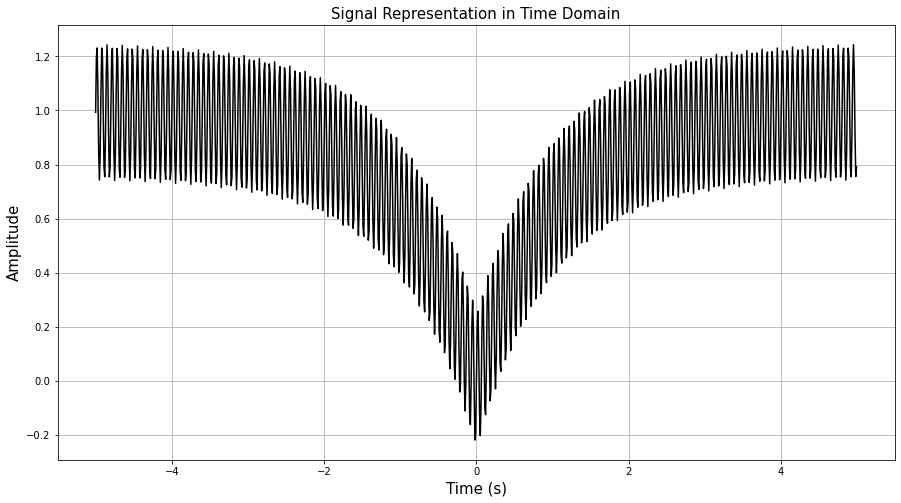

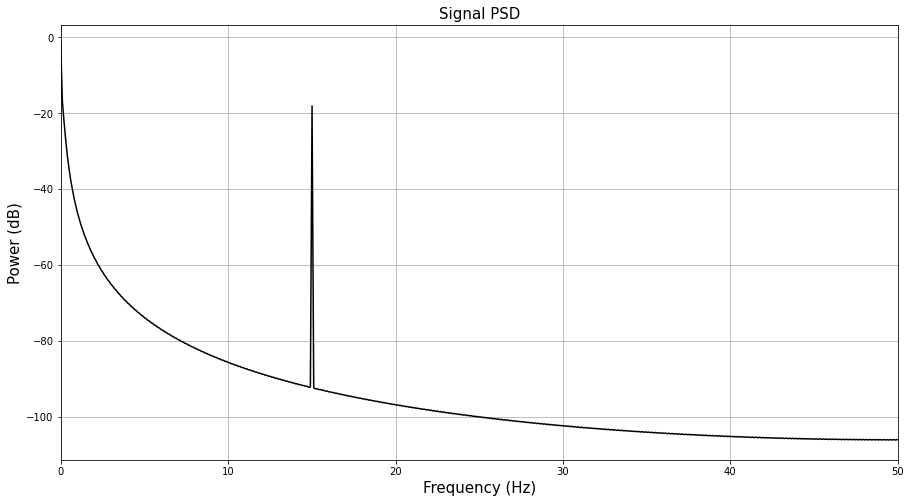

In [11]:
plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(signal_pow) , c = 'black')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal PSD" , fontsize = 15)
plt.xlim([0 , sample_rate/2])
plt.grid()

### 2.1. Wrong Method: Downsampling without low-pass Filtering

In [12]:
downsample_factor = 4 
new_Npnts = int(np.round(Npnts / downsample_factor))
new_sample_rate = sample_rate / downsample_factor
new_signal = []
new_time = []
for i in range(Npnts):
    if np.mod(i,downsample_factor) == 0:
        new_time = np.append(new_time , time[i])
        new_signal = np.append(new_signal , signal[i])

### PSD:
new_hz = np.linspace(0 , new_sample_rate , new_Npnts)
new_signal_pow = np.abs(np.fft.fft(new_signal)/new_Npnts)**2

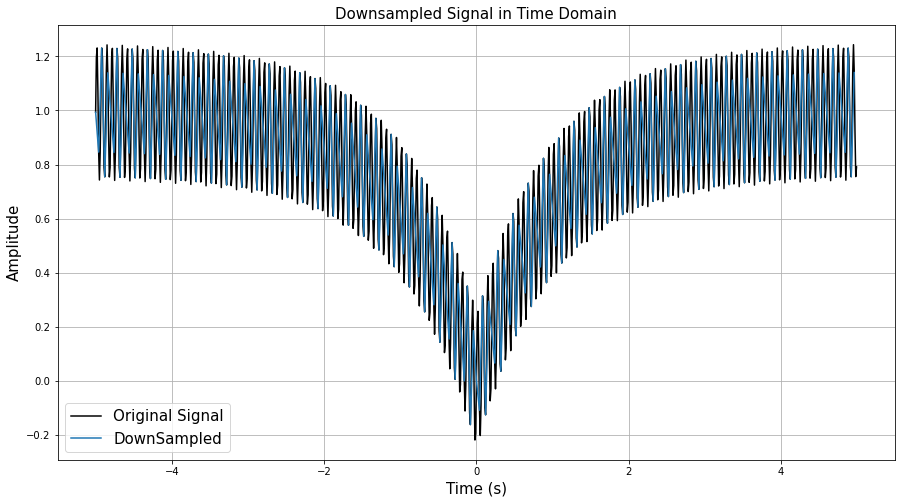

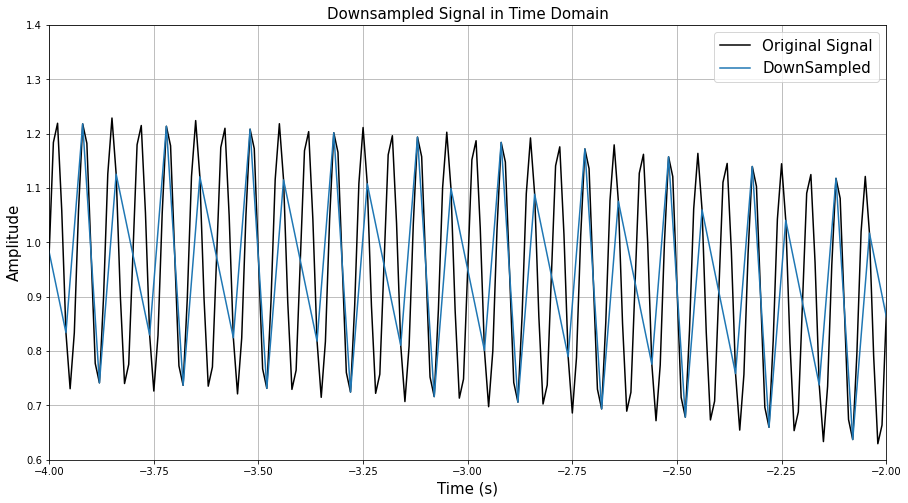

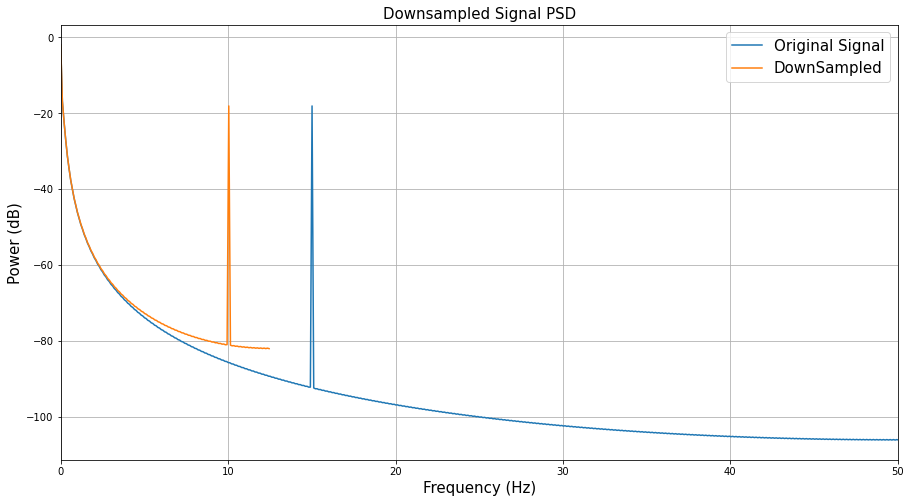

In [13]:
plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'black' , label = 'Original Signal')
plt.plot(new_time , new_signal , label = 'DownSampled')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Downsampled Signal in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'black' , label = 'Original Signal')
plt.plot(new_time , new_signal , label = 'DownSampled')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([-4, -2])
plt.ylim([0.6 , 1.4])
plt.title("Downsampled Signal in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(signal_pow) , label = 'Original Signal')
plt.plot(new_hz[:int(len(new_hz)/2)] , 10*np.log10(new_signal_pow[:int(len(new_hz)/2)]) , label = 'DownSampled')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Downsampled Signal PSD" , fontsize = 15)
plt.xlim([0 , sample_rate/2])
plt.legend(fontsize = 15)
plt.grid()

### 2.1. Right approach: Downsampling after low-pass Filtering

In [14]:
# downsample_factor = 4 
new_sample_rate = sample_rate / downsample_factor
new_nyquist = new_sample_rate/2

desired_band = np.array([0 , new_nyquist-0.01*new_nyquist , new_nyquist , sample_rate/2])
desired_gain = [1 , 1 , 0 , 0]
fir_firls = firls(64*new_nyquist+1 , desired_band , desired_gain , fs = sample_rate)
signal_ext = np.append(signal , signal[::-1])
filt_signal = lfilter(fir_firls , 1 , signal_ext)
filt_signal = lfilter(fir_firls , 1 , filt_signal[::-1])[::-1][:len(signal)]

new_filt_signal = []
new_filt_time = []
for i in range(Npnts):
    if np.mod(i,downsample_factor) == 0:
        new_filt_time = np.append(new_filt_time , time[i])
        new_filt_signal = np.append(new_filt_signal , filt_signal[i])

### PSD:
new_hz = np.linspace(0 , new_sample_rate , new_Npnts)
new_filt_signal_pow = np.abs(np.fft.fft(new_filt_signal)/new_Npnts)**2

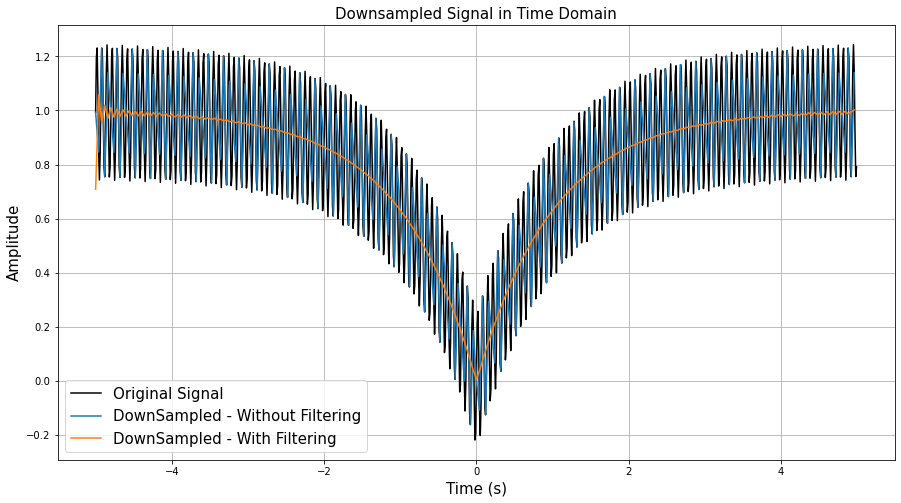

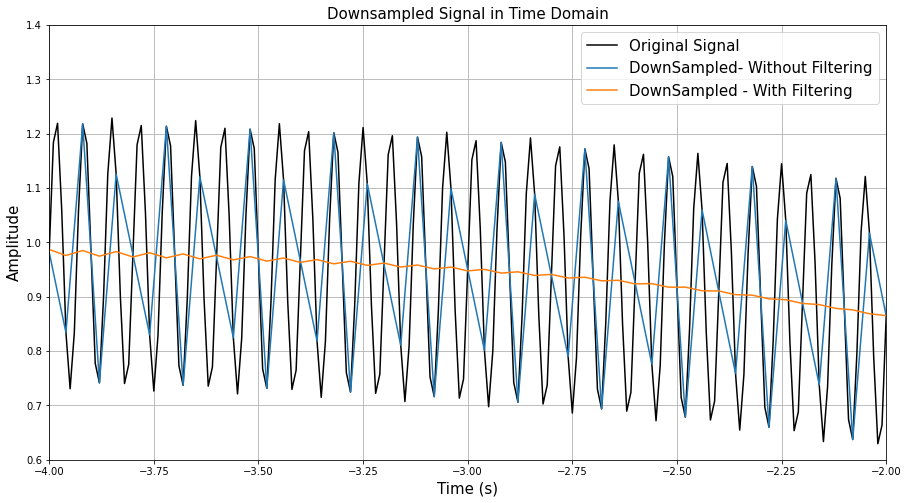

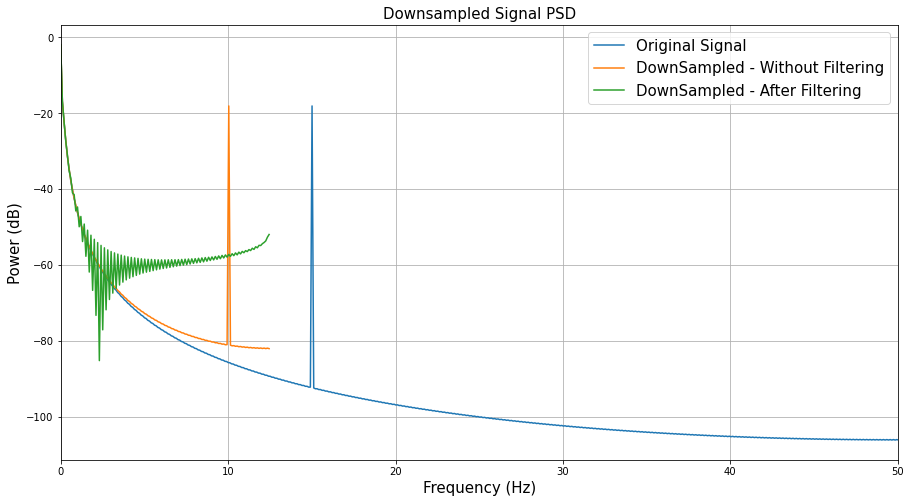

In [15]:
plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'black' , label = 'Original Signal')
plt.plot(new_time , new_signal , label = 'DownSampled - Without Filtering')
plt.plot(new_time , new_filt_signal , label = 'DownSampled - With Filtering')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Downsampled Signal in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'black' , label = 'Original Signal')
plt.plot(new_time , new_signal , label = 'DownSampled- Without Filtering')
plt.plot(new_time , new_filt_signal , label = 'DownSampled - With Filtering')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([-4, -2])
plt.ylim([0.6 , 1.4])
plt.title("Downsampled Signal in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(signal_pow) , label = 'Original Signal')
plt.plot(new_hz[:int(len(new_hz)/2)] , 10*np.log10(new_signal_pow[:int(len(new_hz)/2)]) , label = 'DownSampled - Without Filtering')
plt.plot(new_hz[:int(len(new_hz)/2)] , 10*np.log10(new_filt_signal_pow[:int(len(new_hz)/2)]) , label = 'DownSampled - After Filtering')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Downsampled Signal PSD" , fontsize = 15)
plt.xlim([0 , sample_rate/2])
plt.legend(fontsize = 15)
plt.grid()

## 3. Strategies for multirate signals

In [16]:
sample_rates = np.array([10,40,83])

start = 0 
stop = 1
time = [np.arange(start,stop,1/sample_rates[0]),
        np.arange(start,stop,1/sample_rates[1]),
        np.arange(start,stop,1/sample_rates[2])]

Npnts = [len(time[0]), len(time[1]) , len(time[2])]

signals = [np.cumsum(np.sign(np.random.randn(Npnts[0]))),
           np.cumsum(np.sign(np.random.randn(Npnts[1]))),
           np.cumsum(np.sign(np.random.randn(Npnts[2])))]

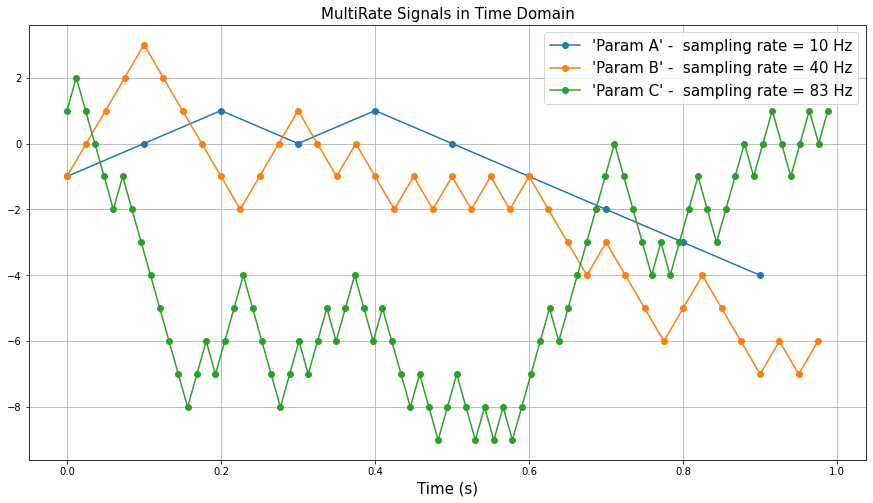

In [17]:
plt.figure(figsize = (15,8))
plt.plot(time[0],signals[0] , marker = 'o' , label='\'Param A\' -  sampling rate = 10 Hz')
plt.plot(time[1],signals[1] , marker = 'o' , label='\'Param B\' -  sampling rate = 40 Hz')
plt.plot(time[2],signals[2] , marker = 'o' , label='\'Param C\' -  sampling rate = 83 Hz')
plt.legend(fontsize = 15)
plt.title('MultiRate Signals in Time Domain' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.grid()

In [18]:
def gcd(a,b): 
    if a == 0: 
        return b 
    return gcd(b % a, a)

In [19]:
new_sample_rate = int(83*40 / gcd(83,40))

new_Npnts = [Npnts[0]*(new_sample_rate/sample_rates[0]),
             Npnts[1]*(new_sample_rate/sample_rates[1]),
             Npnts[2]*(new_sample_rate/sample_rates[2])]

new_time = np.arange(0 , 1 , 1/new_sample_rate)
new_times = [new_time[new_time<=np.max(time[0])],
             new_time[new_time<=np.max(time[1])],
             new_time[new_time<=np.max(time[2])]]
             
interp_obj = [interpolate.interp1d(time[0] , signals[0] , kind = 'cubic'),
              interpolate.interp1d(time[1] , signals[1] , kind = 'cubic'),
              interpolate.interp1d(time[2] , signals[2] , kind = 'cubic')]
              
new_signal = [interp_obj[0](new_times[0]),
              interp_obj[1](new_times[1]),
              interp_obj[2](new_times[2])]

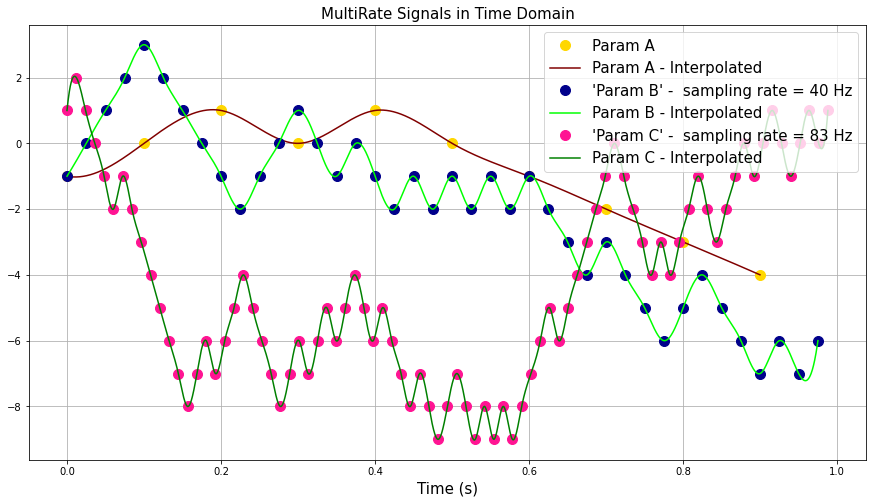

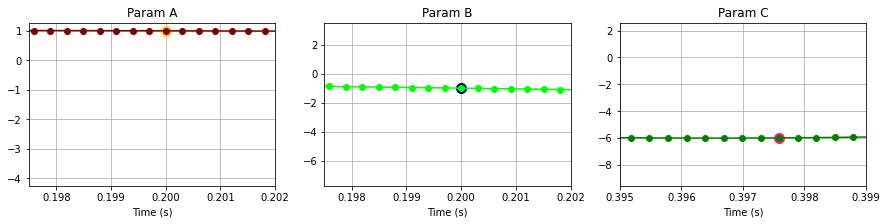

In [20]:
plt.figure(figsize = (15,8))
plt.plot(time[0],signals[0] , marker = 'o' , linewidth = 0 , markersize = 10 ,  label='Param A' , c = 'gold')
plt.plot(new_times[0] , new_signal[0] , label = 'Param A - Interpolated' , c = 'maroon')
plt.plot(time[1],signals[1] , marker = 'o',
         label='\'Param B\' -  sampling rate = 40 Hz', linewidth = 0 , markersize = 10 , c = 'darkblue')
plt.plot(new_times[1] , new_signal[1] , label = 'Param B - Interpolated' , c='lime')
plt.plot(time[2],signals[2] , marker = 'o',
         label='\'Param C\' -  sampling rate = 83 Hz', linewidth = 0 , markersize = 10 , c = 'deeppink')
plt.plot(new_times[2] , new_signal[2] , label = 'Param C - Interpolated' , c='g')
plt.legend(fontsize = 15)
plt.title('MultiRate Signals in Time Domain' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.grid()

plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
plt.plot(time[0],signals[0] , marker = 'o' , linewidth = 0 , markersize = 10 ,  label='Param A' , c = 'gold')
plt.plot(new_times[0] , new_signal[0] , marker = 'o', label = 'Param A - Interpolated' , c = 'maroon')
plt.xlabel('Time (s)')
plt.xlim([0.1975,0.2020])
plt.title('Param A')
plt.grid()

plt.subplot(1,3,2)
plt.plot(time[1],signals[1] , marker = 'o',
         label='\'Param B\' -  sampling rate = 40 Hz', linewidth = 0 , markersize = 10 , c = 'darkblue')
plt.plot(new_times[1] , new_signal[1] , marker = 'o', label = 'Param B - Interpolated' , c = 'lime')
plt.xlabel('Time (s)')
plt.xlim([0.1975,0.2020])
plt.title('Param B')
plt.grid()

plt.subplot(1,3,3)
plt.plot(time[2],signals[2] , marker = 'o',
         label='\'Param C\' -  sampling rate = 83 Hz', linewidth = 0 , markersize = 10 , c = 'deeppink')
plt.plot(new_times[2] , new_signal[2] , marker = 'o', label = 'Param C - Interpolated' , c='g')
plt.xlabel('Time (s)')
plt.xlim([0.395,0.399])
plt.title('Param C')
plt.grid()

## 4. Interpolation

In [21]:
sample_rate = 10
data = np.array([1,4,3,6,2,19])
Npnts = len(data)
time = np.arange(0 , Npnts)/sample_rate

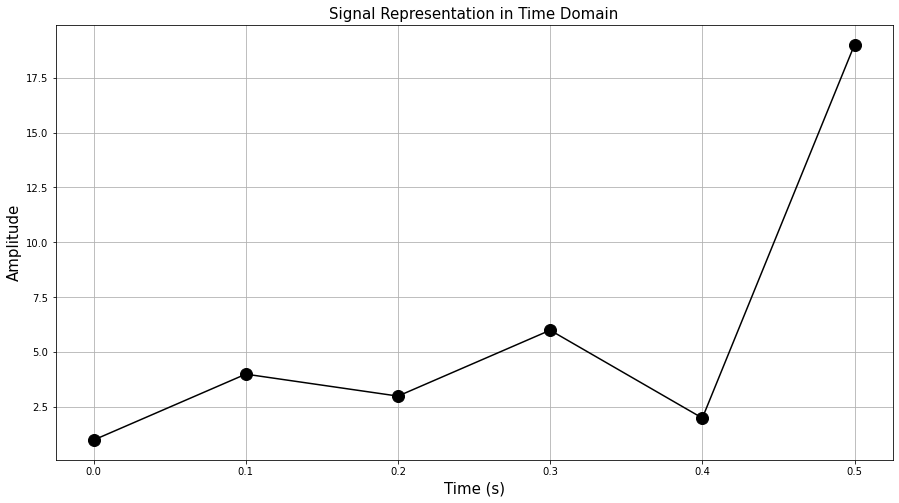

In [22]:
plt.figure(figsize = (15,8))
plt.plot(time , data , marker ='o' , markersize = 12 , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

In [23]:
data_fft = np.abs(np.fft.fft(data)/len(time))**2
hz = np.linspace(0 , sample_rate , len(time))

In [24]:
new_Npnts = 47 #samples
sample_factor = np.round(new_Npnts / np.max(time)/sample_rate)
new_sample_rate = sample_factor * sample_rate
new_time = np.arange(0 , new_Npnts)/new_sample_rate
new_time = new_time[new_time<=np.max(time)]

new_hz = np.linspace(0,new_sample_rate,len(new_time))

interpkind = ['linear' , 'nearest' , 'zero' , 'slinear' , 'quadratic',
              'cubic'  , 'previous' , 'next']
new_data =[]
new_data_fft = []
for i in range(len(interpkind)):
    temp = interpolate.interp1d(time , data , kind = interpkind[i])(new_time)
    new_data.append(temp)
    new_data_fft.append(np.abs(np.fft.fft(temp)/len(new_time))**2)

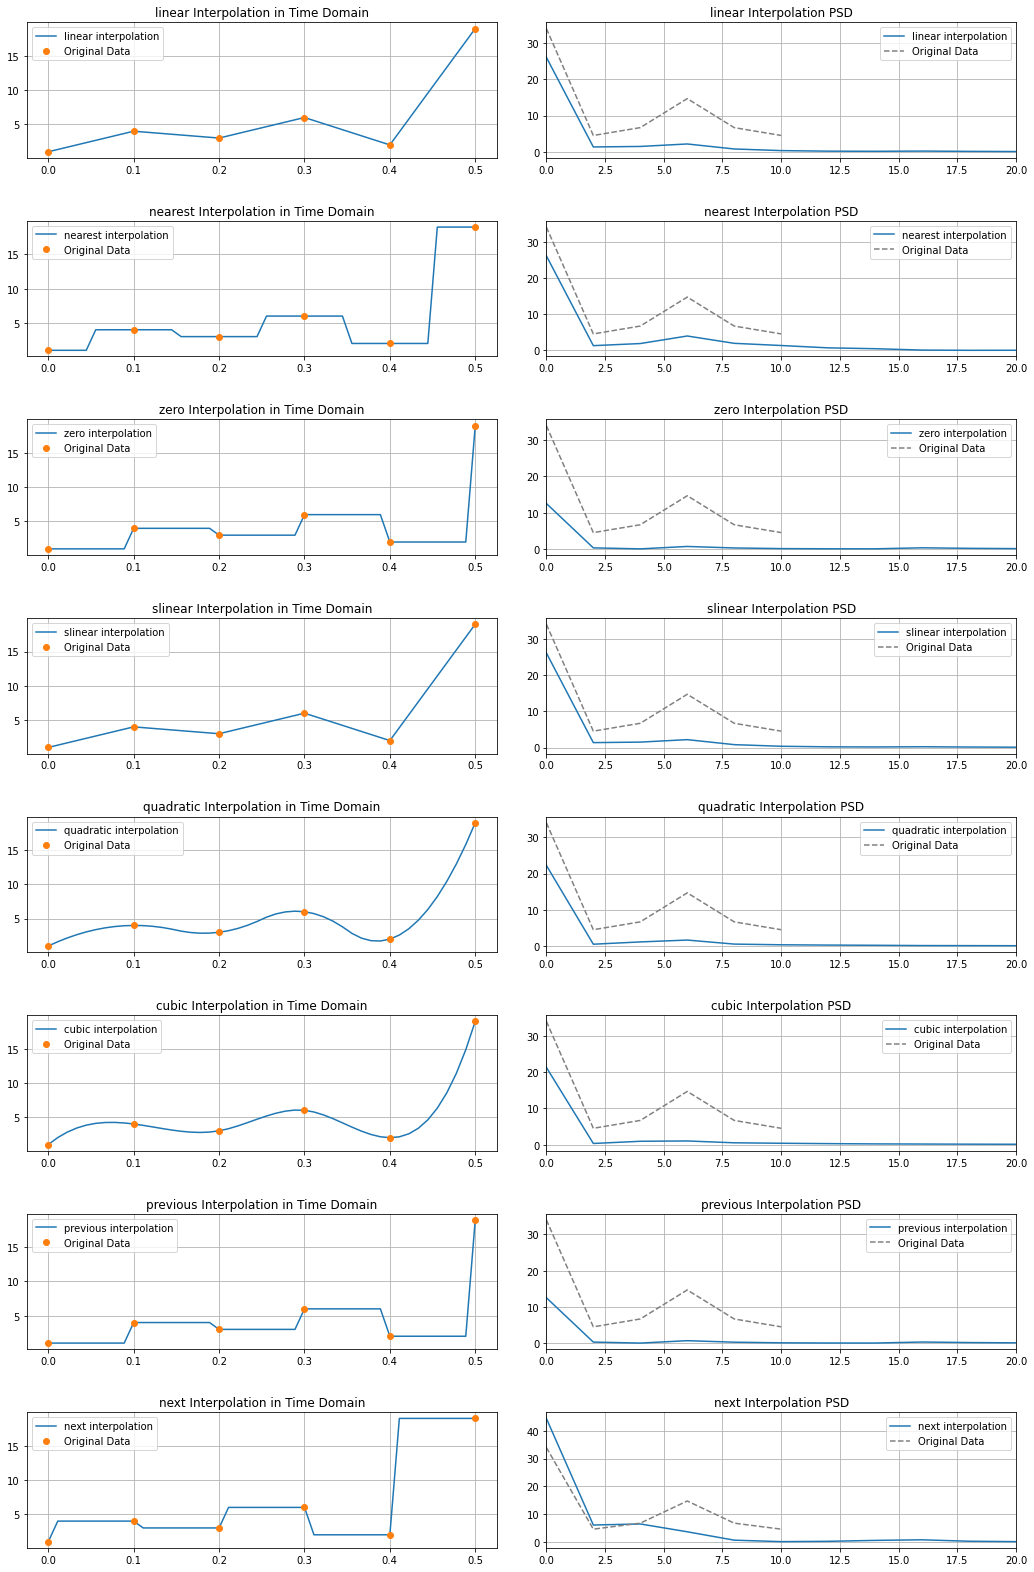

In [25]:
count = 1 
plt.figure(figsize = (15,25))
for i in range(len(interpkind)):
    plt.subplot(len(interpkind)+1,2,count)
    plt.plot(new_time , new_data[i] , label = '{} interpolation'.format(interpkind[i]))
    plt.plot(time , data , marker = 'o' , linewidth = 0 , label = 'Original Data')
    plt.title('{} Interpolation in Time Domain'.format(interpkind[i]))
    plt.legend()
    plt.grid()
    
    count +=1
    plt.subplot(len(interpkind)+1,2,count)
    plt.plot(new_hz , new_data_fft[i], label = '{} interpolation'.format(interpkind[i]))
    plt.plot(hz , data_fft , linestyle = 'dashed' , c='grey' , label = 'Original Data')
    plt.title('{} Interpolation PSD'.format(interpkind[i]))
    plt.xlim([0 , 20])
    plt.legend()
    plt.grid()
    plt.tight_layout(pad=3.0)
    count +=1

## 5. Resampling irregularly sampled data

### 5.1. Generating the Original Signal

In [26]:
#Params:
sample_rate = 1324
peak_freq = 7 
FWHM = 5
Npnts = sample_rate*2
time = np.arange(0,2,1/sample_rate)

#Freqs:
hz = np.linspace(0,sample_rate,Npnts)
S = FWHM*(2*np.pi-1)/(4*np.pi)
X = hz - peak_freq
Fg = np.exp(-0.5*(X/S)**2)

Fc = np.random.rand(Npnts)*np.exp(1j*2*np.pi*np.random.rand(Npnts))
Fc = Fc * Fg

signal = 2*np.real(np.fft.ifft(Fc))*Npnts

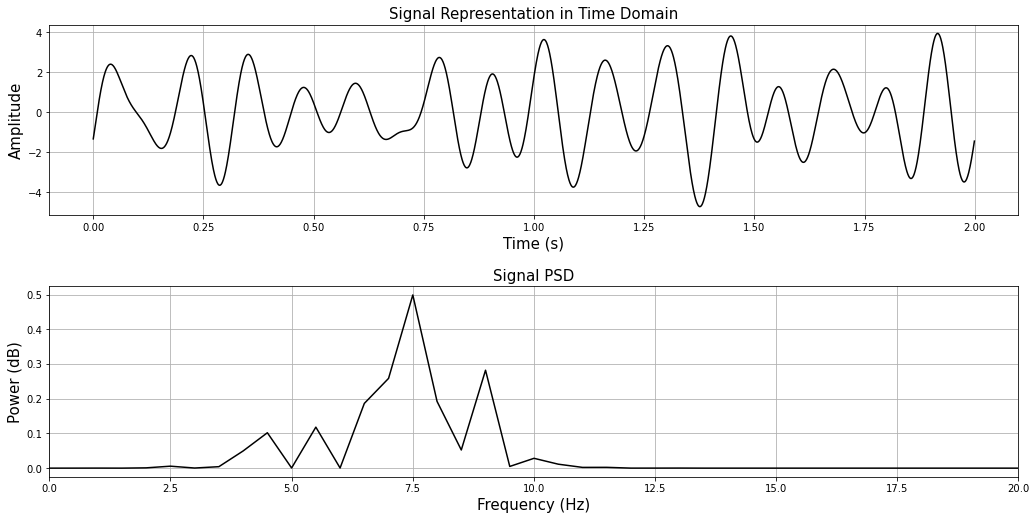

In [27]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(time , signal  , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

plt.subplot(2,1,2)
plt.plot(hz , (np.abs(Fc)**2)  , c = 'black')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.tight_layout(pad=3.5)
plt.xlim([0,20])
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal PSD" , fontsize = 15)
plt.grid()

### 5.2. Sampling the Signal Randomly

In [28]:
temp = np.ceil(np.exp(4*np.random.rand(Npnts)))
sample_interval = np.cumsum(np.append(temp,1))
sample_interval = sample_interval[sample_interval<=Npnts]

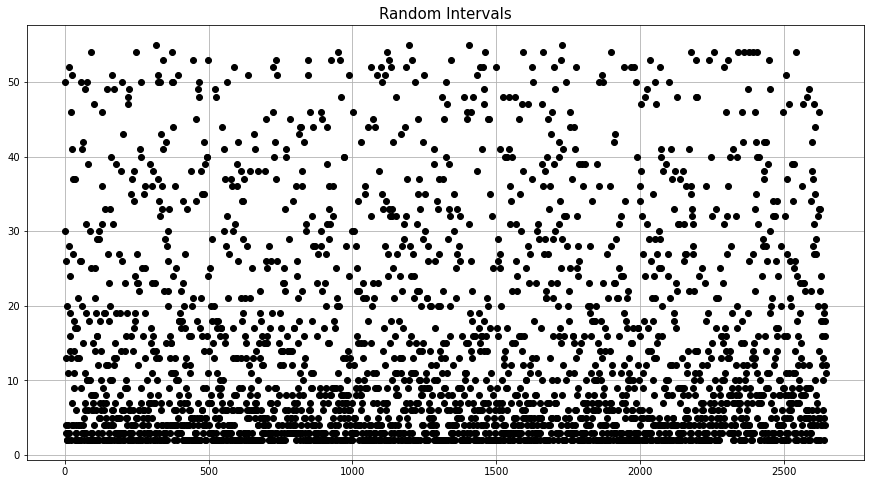

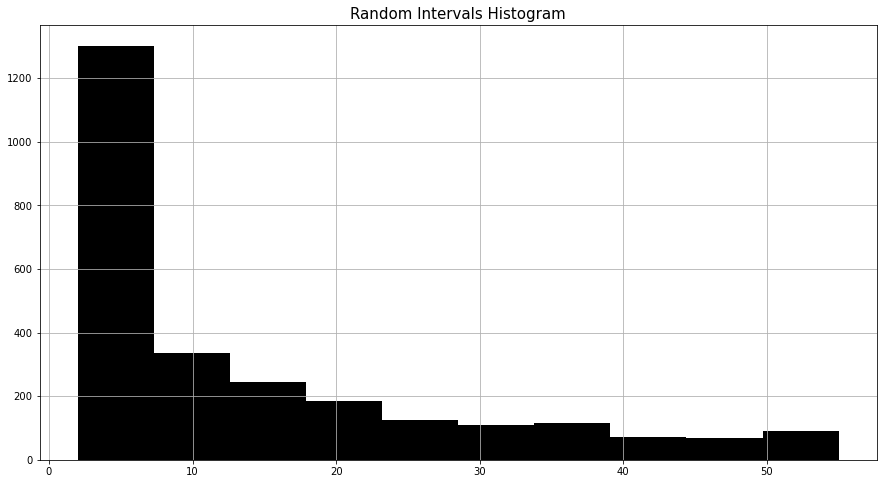

In [29]:
plt.figure(figsize = (15,8))
plt.plot(temp , c='black' , linewidth = 0 , marker = 'o')
plt.grid()
plt.title('Random Intervals' , fontsize = 15)

plt.figure(figsize = (15,8))
plt.hist(temp , color = 'black')
plt.grid()
plt.title('Random Intervals Histogram' , fontsize = 15);

In [30]:
signal_sampled = np.zeros(len(sample_interval))
time_sampled   = np.zeros(len(sample_interval))
for i in range(len(sample_interval)):
    signal_sampled[i] = signal[int(sample_interval[i])]
    time_sampled[i] = time[int(sample_interval[i])]

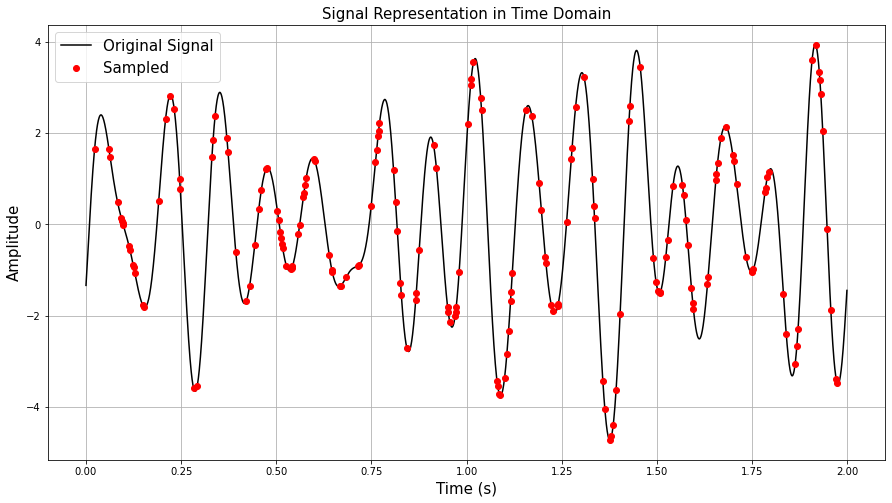

In [31]:
plt.figure(figsize = (15,8))
plt.plot(time , signal  , c = 'black' , label = 'Original Signal')
plt.plot(time_sampled , signal_sampled , marker ='o' , c='r' , linewidth = 0 , label = 'Sampled')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

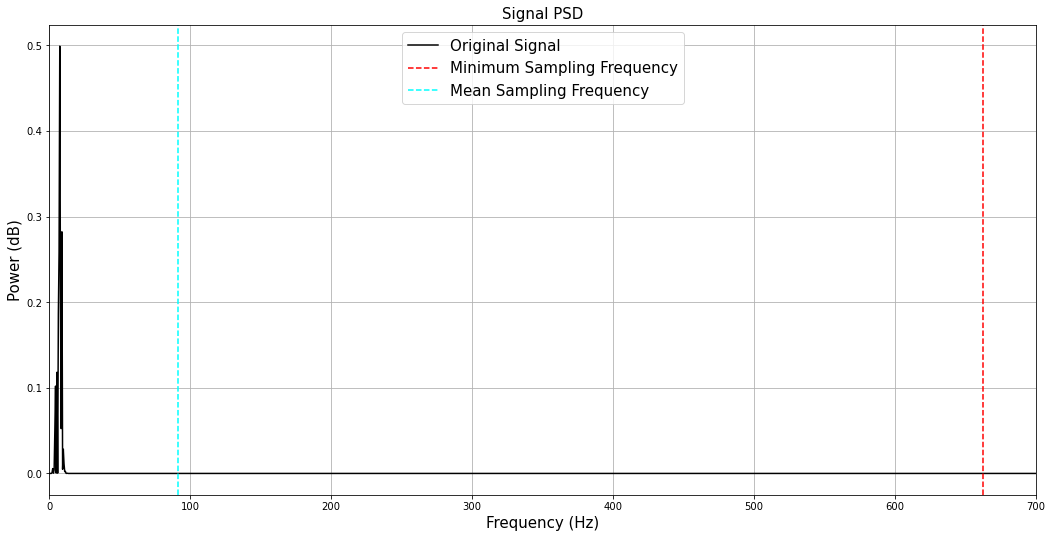

In [32]:
plt.figure(figsize = (15,8))
plt.plot(hz , (np.abs(Fc)**2)  , c = 'black' , label='Original Signal')
plt.axvline(x = 1/np.min(np.diff(time_sampled)) , ymin=0 , ymax=1,
            linestyle = 'dashed' , c='r' , label='Minimum Sampling Frequency')

plt.axvline(x = 1/np.mean(np.diff(time_sampled)) , ymin=0 , ymax=1,
            linestyle = 'dashed' , c='cyan' , label='Mean Sampling Frequency')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.tight_layout(pad=3.5)
plt.xlim([0,700])
plt.legend(fontsize = 15)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal PSD" , fontsize = 15)
plt.grid()

In [33]:
time_interp = time[time<np.max(time_sampled)]
time_interp = time_interp[np.min(time_sampled)<time_interp] 
signal_interp = interpolate.interp1d(time_sampled , signal_sampled)(time_interp)

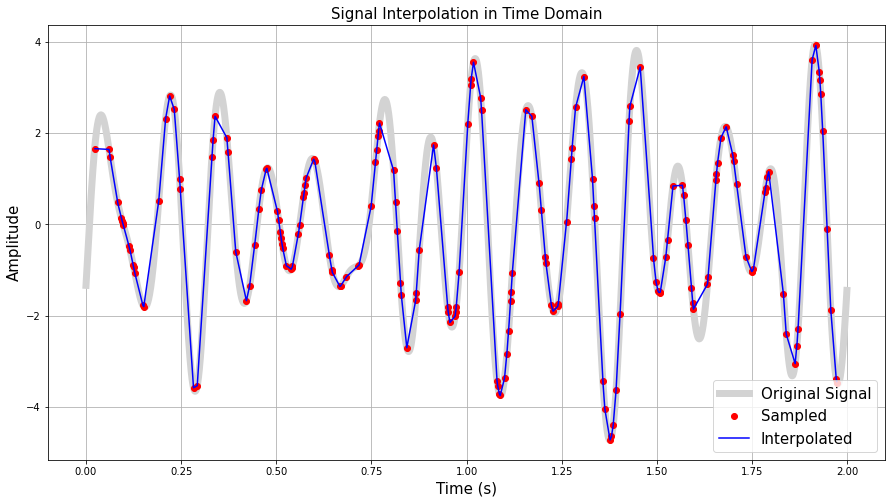

In [34]:
plt.figure(figsize = (15,8))
plt.plot(time , signal  , c = 'lightgrey' , label = 'Original Signal' , linewidth = 7)
plt.plot(time_sampled , signal_sampled , marker ='o' , c='r' , linewidth = 0 , label = 'Sampled')
plt.plot(time_interp , signal_interp , c='b' , label = 'Interpolated')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Signal Interpolation in Time Domain" , fontsize = 15)
plt.grid()

## 6. Extrapolation

In [35]:
#Params:
sample_rate = 1000
peak_freq = 70 
FWHM = 20
Npnts = int(sample_rate*0.2)
time = np.arange(0,0.2,1/sample_rate)

#Freqs:
hz = np.linspace(0,sample_rate,Npnts)
S = FWHM*(2*np.pi-1)/(4*np.pi)
X = hz - peak_freq
Fg = np.exp(-0.5*(X/S)**2)

Fc = np.random.rand(Npnts)*np.exp(1j*2*np.pi*np.random.rand(Npnts))
Fc = Fc * Fg

signal = 2*np.real(np.fft.ifft(Fc))*Npnts

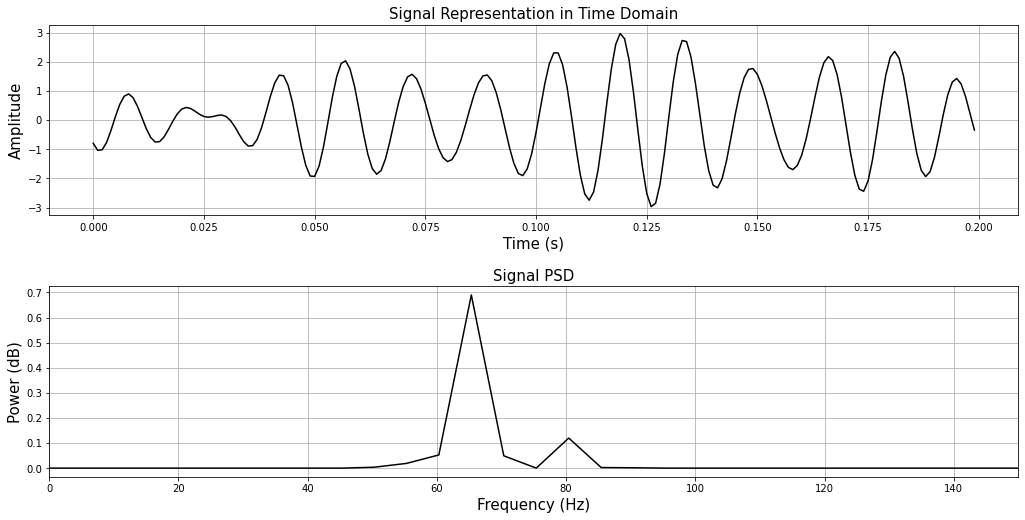

In [36]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(time , signal  , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

plt.subplot(2,1,2)
plt.plot(hz , (np.abs(Fc)**2)  , c = 'black')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.tight_layout(pad=3.5)
plt.xlim([0,150])
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal PSD" , fontsize = 15)
plt.grid()

In [37]:
#Downsampling:
samplings = np.array([100 , 250 , 500])
sample_factor = sample_rate / samplings

signal_down = [signal[::int(sample_factor[0])],
               signal[::int(sample_factor[1])],
               signal[::int(sample_factor[2])]]

time_down = [time[::int(sample_factor[0])],
             time[::int(sample_factor[1])],
             time[::int(sample_factor[2])]]

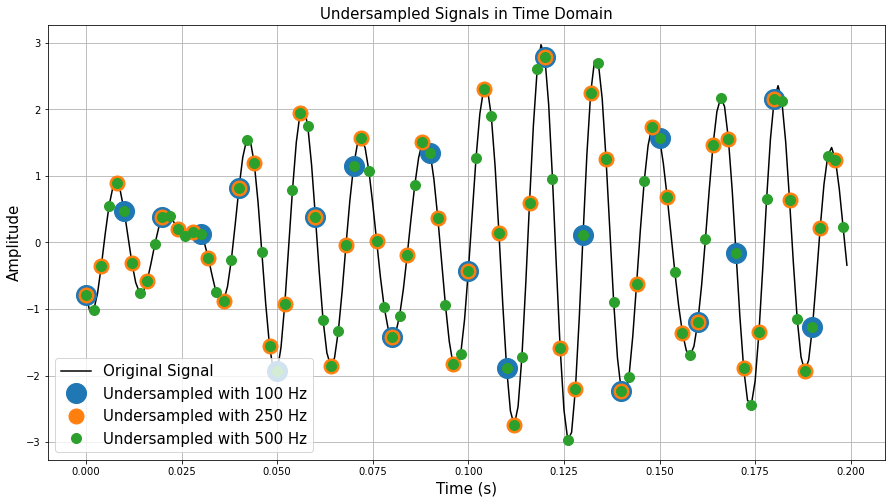

In [38]:
plt.figure(figsize = (15,8))
plt.plot(time , signal  , c = 'black' , label = 'Original Signal')
plt.plot(time_down[0] , signal_down[0] , marker = 'o', markersize = 20,
         linewidth = 0 , label = 'Undersampled with {} Hz'.format(samplings[0]))

plt.plot(time_down[1] , signal_down[1] , marker = 'o', markersize = 15,
         linewidth = 0 , label = 'Undersampled with {} Hz'.format(samplings[1]))

plt.plot(time_down[2] , signal_down[2] , marker = 'o', markersize = 10,
         linewidth = 0 , label = 'Undersampled with {} Hz'.format(samplings[2]))

plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Undersampled Signals in Time Domain" , fontsize = 15)
plt.grid()

We want to extrapolate the last sample in each sampled signal. In other word:  

In [39]:
signal_down_test = [signal_down[0][:len(signal_down[0])-1],
                    signal_down[1][:len(signal_down[1])-1],
                    signal_down[2][:len(signal_down[2])-1]]

time_down_test = [time_down[0][:len(time_down[0])-1],
                  time_down[1][:len(time_down[1])-1],
                  time_down[2][:len(time_down[2])-1]]

In [40]:
signal_extrap = [interpolate.interp1d(time_down_test[0] , signal_down_test[0] , kind = 'cubic' , 
                                      fill_value = 'extrapolate')(time_down[0]),
                 interpolate.interp1d(time_down_test[1] , signal_down_test[1] , kind = 'cubic' , 
                                      fill_value = 'extrapolate')(time_down[1]),
                 interpolate.interp1d(time_down_test[2] , signal_down_test[2] , kind = 'cubic' , 
                                      fill_value = 'extrapolate')(time_down[2])]

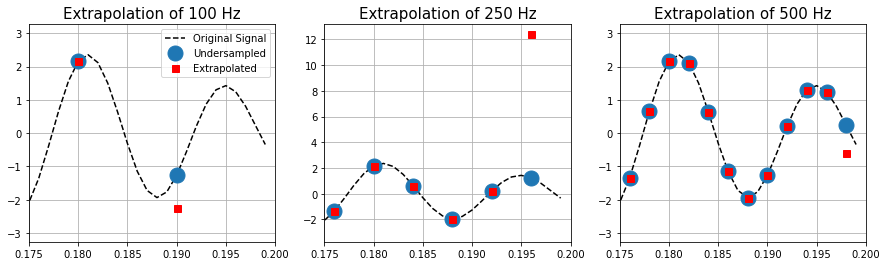

In [41]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.plot(time , signal  , c = 'black' , label = 'Original Signal' , linestyle = 'dashed')
plt.plot(time_down[0] , signal_down[0] , marker = 'o', markersize = 15,
         linewidth = 0 , label = 'Undersampled')
plt.plot(time_down[0] , signal_extrap[0], markersize = 7,
         marker = 's' , linewidth = 0 , label='Extrapolated' , c='r')
plt.xlim([0.175,0.2])
#plt.ylim([-1.3,1.2])
plt.grid()
plt.legend()
plt.title('Extrapolation of {} Hz'.format(samplings[0]) , fontsize = 15);

plt.subplot(1,3,2)
plt.plot(time , signal  , c = 'black' , label = 'Original Signal' , linestyle = 'dashed')
plt.plot(time_down[1] , signal_down[1] , marker = 'o', markersize = 15,
         linewidth = 0 , label = 'Undersampled')
plt.plot(time_down[1] , signal_extrap[1] , markersize = 7,
         marker = 's' , linewidth = 0 , label='Extrapolated' , c='r')
plt.xlim([0.175,0.2])
#plt.ylim([-1.3,1.2])
plt.grid()
plt.title('Extrapolation of {} Hz'.format(samplings[1]) , fontsize = 15);

plt.subplot(1,3,3)
plt.plot(time , signal  , c = 'black' , label = 'Original Signal' , linestyle = 'dashed')
plt.plot(time_down[2] , signal_down[2] , marker = 'o', markersize = 15,
         linewidth = 0 , label = 'Undersampled with {} Hz'.format(samplings[2]))
plt.plot(time_down[2] , signal_extrap[2] , markersize = 7,
         marker = 's' , linewidth = 0 , label='Extrapolated' , c='r')
plt.xlim([0.175,0.2])
#plt.ylim([-1.3,1.2])
plt.grid()
plt.title('Extrapolation of {} Hz'.format(samplings[2]) , fontsize = 15);

## 7. Spectral interpolation

In [42]:
Npnts = 1000
signal = np.cumsum(np.random.randn(Npnts))
time = np.linspace(0 , 1 , Npnts)
sample_rate = Npnts / np.max(time)
hz = np.linspace(0 , sample_rate , Npnts)
signal_fft = np.abs(np.fft.fft(signal)/Npnts)**2

R = np.append(np.append(signal[:int(Npnts/2)] , 100*np.random.randn(100) ) , signal[int(Npnts/2)+100:])
R_fft = np.abs(np.fft.fft(R)/Npnts)**2

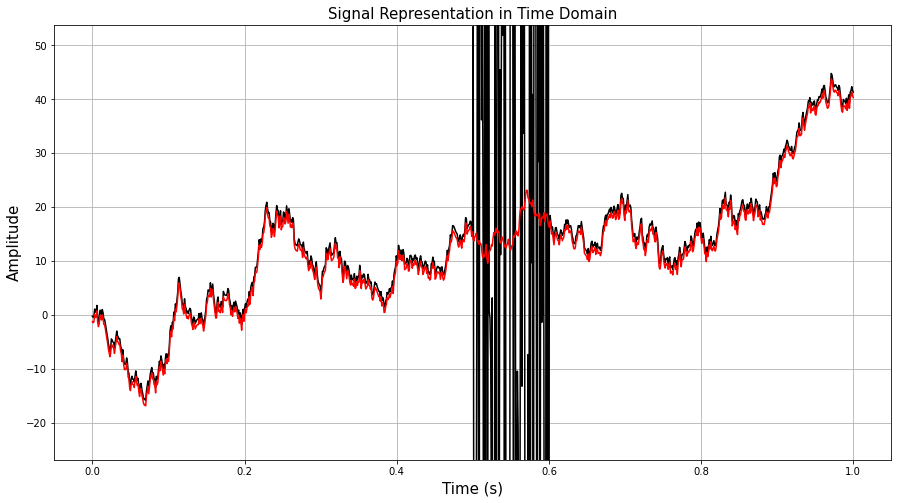

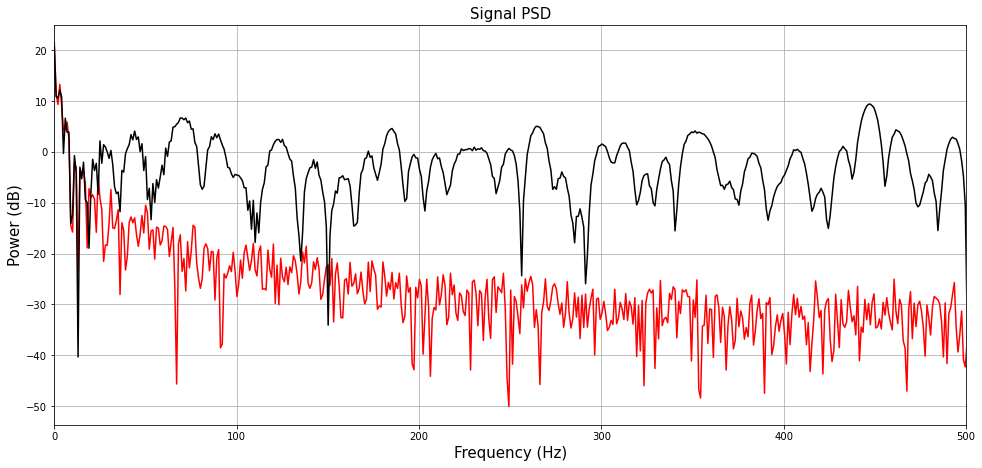

In [43]:
plt.figure(figsize = (15,8))
plt.plot(time , R+1 , c = 'black')
plt.plot(time , signal , c = 'r')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.ylim([np.min(signal)-10,np.max(signal)+10])
plt.title("Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(signal_fft) , c = 'r')
plt.plot(hz , 10*np.log10(R_fft) , c = 'black')
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.tight_layout(pad=7)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal PSD" , fontsize = 15)
plt.xlim([0 , sample_rate/2])
plt.grid()

In order to reduce this effect, we simply omit the time with high ampiltude artifacts. 

In [44]:
R_omit = np.append(np.append(signal[:int(Npnts/2)] , np.zeros(100)/0 ) , signal[int(Npnts/2)+100:])

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


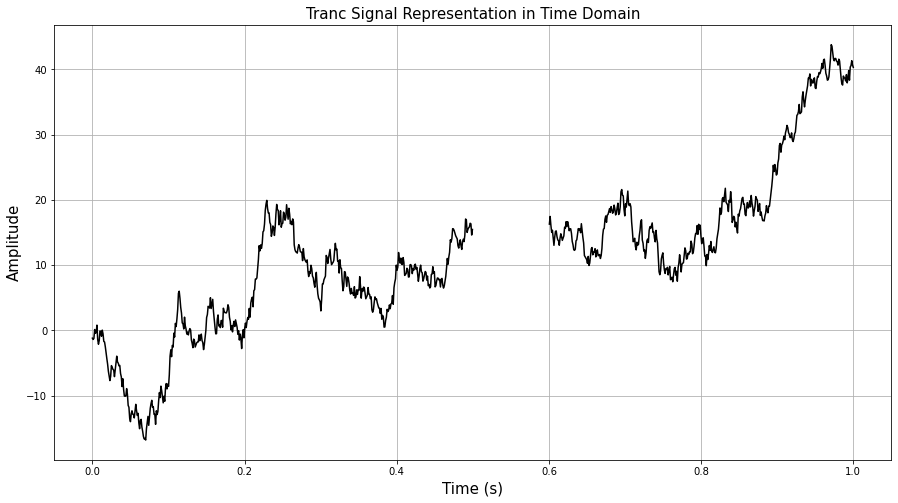

In [45]:
plt.figure(figsize = (15,8))
plt.plot(time , R_omit , c = 'black')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.title("Tranc Signal Representation in Time Domain" , fontsize = 15)
plt.grid()

### 7.1. Interpolate the signals in between in Time Domain

In [56]:
time_omit = np.append(time[:int(Npnts/2)] , time[int(Npnts/2)+100:])
signal_omit = np.append(signal[:int(Npnts/2)] , signal[int(Npnts/2)+100:])
R_interp = interpolate.interp1d(time_omit , signal_omit) (time)
R_interp_fft = np.abs(np.fft.fft(R_interp)/Npnts)**2

### 7.2. Interpolate by the help of PSD

In [72]:
pre_signal = signal[500-100:500]
post_signal = signal[600:600+100]

pre_signal_fft = (np.fft.fft(pre_signal)/100)
post_signal_fft = (np.fft.fft(post_signal)/100)
mean_signal_fft = (pre_signal_fft + post_signal_fft)/2

signal_interp_fft = (np.real(np.fft.ifft(mean_signal_fft)*100))
R_interp_fft = np.append(np.append(signal[:int(Npnts/2)] , signal_interp_fft ) , signal[int(Npnts/2)+100:])

signal_interp_detrend = np.linspace(signal[int(Npnts/2)] , signal[int(Npnts/2)+100] , 100)*detrend(signal_interp_fft/np.mean(signal_interp_fft)*np.mean(signal))
R_interp_detrend = np.append(np.append(signal[:int(Npnts/2)] , signal_interp_detrend ) , signal[int(Npnts/2)+100:])
R_interp_detrend_fft = np.abs(np.fft.fft(R_interp_detrend)/Npnts)**2

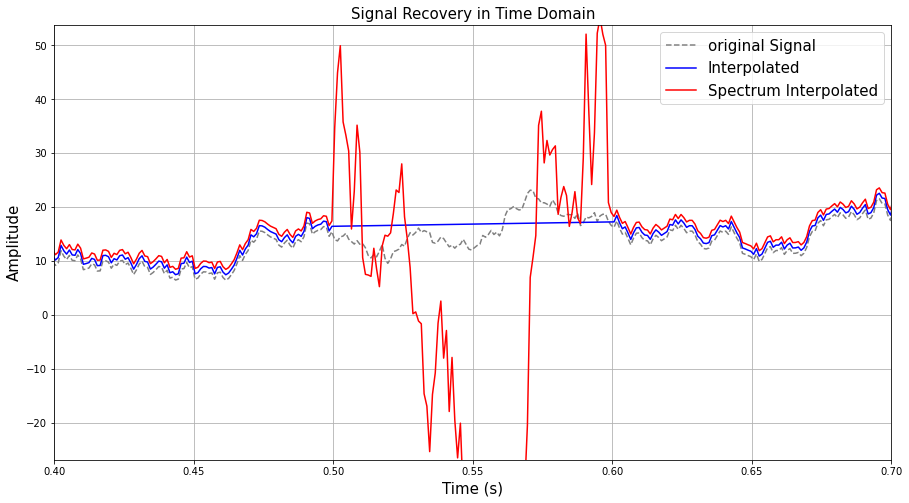

In [74]:
plt.figure(figsize = (15,8))
plt.plot(time , signal , c = 'grey' , linestyle = 'dashed' , label = 'original Signal')
plt.plot(time , R_interp+1 , label = 'Interpolated' , c = 'b')
plt.plot(time , R_interp_detrend+2 , label = 'Spectrum Interpolated' , c='r')
plt.xlabel('Time (s)'  , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.ylim([np.min(signal)-10,np.max(signal)+10])
plt.title("Signal Recovery in Time Domain" , fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0.400,0.700])
plt.grid()




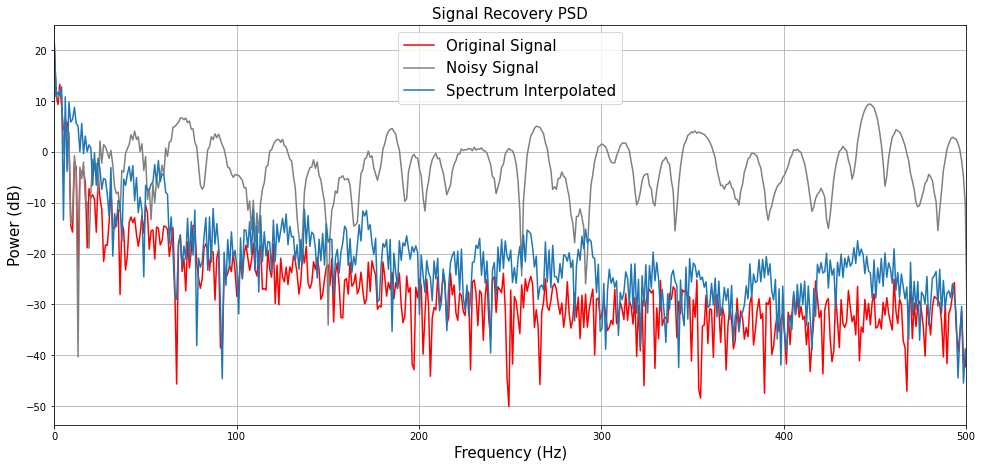

In [49]:
plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(signal_fft) , c = 'r' , label = 'Original Signal')
plt.plot(hz , 10*np.log10(R_fft) , c = 'grey' , label = 'Noisy Signal')
plt.plot(hz , 10*np.log10(R_interp_detrend_fft) , label = 'Spectrum Interpolated')

plt.legend(fontsize = 15)
plt.xlabel('Frequency (Hz)'  , fontsize = 15)
plt.tight_layout(pad=7)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.title("Signal Recovery PSD" , fontsize = 15)
plt.xlim([0 , sample_rate/2])
plt.grid()

## 8. Dynamic Time Warping

In [50]:
#Signal1:
t1 = np.linspace(0 , 1.5*np.pi , 400)
x1 = np.sin(t1**2)

#Signal2:
t2 = np.linspace(0 , 8*np.pi   , 100)
x2 = np.sin(t2)

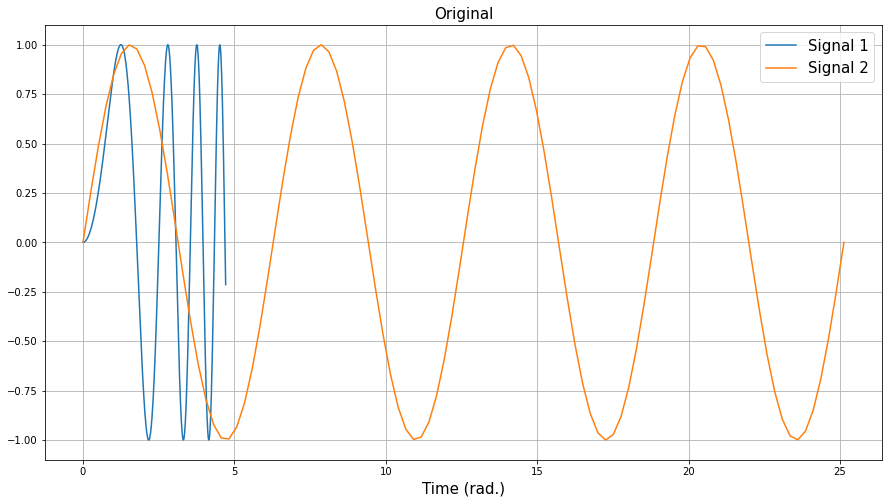

In [51]:
plt.figure(figsize = (15,8))
plt.plot(t1 , x1 , label = 'Signal 1')
plt.plot(t2 , x2 , label = 'Signal 2')
plt.xlabel('Time (rad.)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()
plt.title('Original' , fontsize = 15);

In [52]:
distance_mat = 10000*np.ones((len(x1)+1 , len(x2)+1))
distance_mat_w = np.zeros((len(x1) , len(x2)))
distance_mat[0,0] = 0 

for i in range(1,len(x1)):
    for j in range(1,len(x2)):
        cost = (np.abs(x1[i] - x2[j]))**1
        temp = np.min([distance_mat[i-1,j], distance_mat[i,j-1] , distance_mat[i-1,j-1]])
        distance_mat[i,j] =  cost + temp
        distance_mat_w[i-1,j-1] = distance_mat[i,j]

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


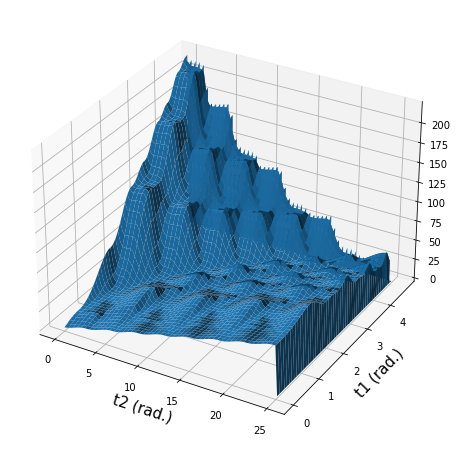

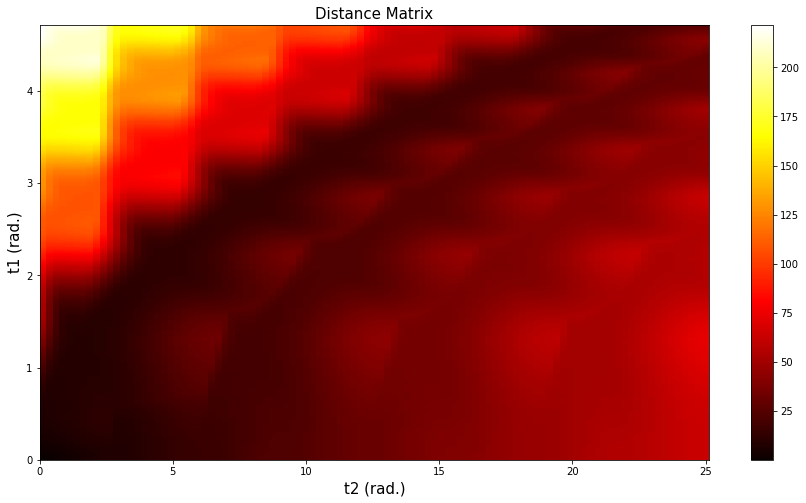

In [53]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')

t12d, t22d = np.meshgrid(t2, t1)
ax.plot_surface(t12d, t22d , distance_mat_w)
plt.xlabel('t2 (rad.)' , fontsize = 15)
plt.ylabel('t1 (rad.)' , fontsize = 15)

fig = plt.figure(figsize = (15,8))
plt.pcolormesh(t12d, t22d , distance_mat_w , cmap = 'hot')
plt.colorbar()
plt.xlabel('t2 (rad.)' , fontsize = 15)
plt.ylabel('t1 (rad.)' , fontsize = 15)
plt.title('Distance Matrix', fontsize = 15);

In [54]:
x1_interp = np.zeros(len(x1))
for i in range(len(x1)):
    x1_interp[i] = x2[np.argmin(distance_mat_w[i,:len(x2)-1])]

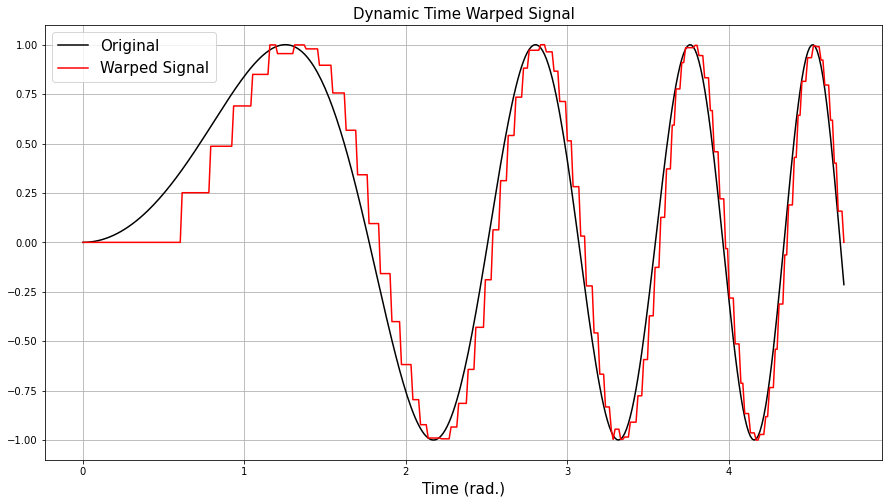

In [55]:
plt.figure(figsize = (15,8))
plt.plot(t1,x1 , label = 'Original' , c = 'black')
plt.plot(t1,x1_interp , label = 'Warped Signal' , c = 'r')
plt.xlabel('Time (rad.)' , fontsize = 15)
plt.title('Dynamic Time Warped Signal' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()
